# Gathering drawing data

> ⚠ Some of the info provided isn't complete yet and doesn't make any sense 
> in some parts through out this notebook.

## Intro
I *manually* collect data from all 1,900+ and counting drawings from an experienced furry artist and illustrator, Paco (aka pandapaco, or Paco Panda). The data will collect things such as:

- Name and date of the artwork
- Species and character names
- Number of character in each artwork
- Facial expressions
- Type (previously Medium) (either drawn digitally or traditional with exceptions of programs and tools used)
- Medium (is for tools/programs used in an artwork)
- Source (either from FurAffinity or DeviantArt)

I was also planning to get the most colors used, as in only in each characters, excluding backgrounds, items, etc. However, because I have deal with shading and color correction, it will be a tedious and cumbersome dataset to obtain; yes we can refer it to their fursona's ref sheet and get the colors that way but there are some cases that it won't be available, so for now - I won't add this dataset.

### `species`, `characters`, and `expressions` columns

Since there are 2 or more characters, and some duplicates - there will be an extra set of columns for each `species`, `characters` and `expressions` that'll be incremented by one. I assume that there are by average 3 to 6 characters he draws on each artwork.

For generalizing the `species` data to the website, it's going to be explicitly categorized into, well... foxes, canines, cats, yeens, etc. Hybrids are categorized in their own category, while species like protogens, and other exotic and/or fictional species will be categorized as "Others".

## How this process works

In [1]:
import pandas as pandapaco

[This Google Sheet](https://docs.google.com/spreadsheets/d/1fpNL-qbfZ53H-6WdqEB2X9rwn9QmM1porJqKgBC7rPk/edit?usp=sharing) contains all raw data and get a slice of data as an example to truncate, summarize, visualize some data through the web browser.

As an example, we'll take one of his artworks [*"First Meet"*](https://www.deviantart.com/pandapaco/art/First-Meet-901151258) and analyze it, the image is cropped for clarity.
<p>
  <a href="https://www.deviantart.com/pandapaco/art/First-Meet-901151258">
    <img src="img/first_meet_by_pandapaco.jpg" width="600">
  </a>
</p>

Two characters are visible: which are Kazan and Steffen respectively, their species are wolf and an otter; Kazan's expression is shy, while Steffen is engaging to Kazan, where I append the `Engaged` value in the `Expression(s)` column; the artwork is traditionally drawn taken from a camera. So overall, the result should be something like this in the dataset:

In [2]:
# todo: Update this!

shy_boi = ['12/19/21', 'First Meet', 'Kazan, Steffen', 'Wolf, Otter',
        'Shy, Engaged', 'Traditional'],

pandapaco.DataFrame(shy_boi, columns = ["Date", "Title", "Character(s)", "Species",
                              "Expression(s)", "Type"])

,Date,Title,Character(s),Species,Expression(s),Type
0,12/19/21,First Meet,"Kazan, Steffen","Wolf, Otter","Shy, Engaged",Traditional


Cool! And in other example, we'll use a huge dataset and will get data from his artwork from January 2021 alone. The column `source` is included in the sheets and shown the first 5 omitted for brevity; it should be something like this:

In [3]:
# Update this dataset from Google Sheets, this is outdated
paco_jan_dataset = pandapaco.read_csv('./csv/paco-jan2021.csv')
paco_jan_dataset.head(5)

,Date,Title,Character(s),Species,Expression(s),Medium
0,1/5/21,Calm always come,"Zak, Cirrus","Fox, Fox","Engaged, Calm",Digital
1,1/7/21,Alf Doggo,Alf,Dog,Neutral,Digital
2,1/8/21,A Hidden Shrine,"Shibby, Emerald","Fox, Fox",Ecstatic,Traditional
3,1/14/21,Puck the Sabertooth,Puck,Sabertooth,"Laughter, Neutral",Digital
4,1/15/21,Doctor Nodd,Nodd,Mouse,Curious,Traditional


Initally, I was using this Python script below to convert an exported CSV files off of Google Sheets into JSON files... The only time I realized that this was the most dumbest thing I've made since D3 and Chart.js can read off of CSV files... lol

In [ ]:
import csv
import json

# Specify a CSV files in the assets folder
# and will split in each dataset then
# dookies out a json file
with open("assets/raw_ps.csv", "r") as f: 
  reader = csv.reader(f)
  next(reader)
  data = []
  for row in reader:
    data.append(
        {"date": row[0],
         "name": row[1],
         "characters": row[2],
         "species": row[3],
         "expressions": row[4],
         "medium": row[5],
         "source": row[6]
         })

with open("assets/final.json", "w") as f:
  json.dump(data, f, indent=2)
  print("Dookied out a stupid json file")

## Plotting data
Basing all the data from 2021 alone, first, we plot a pie chart for sums of artworks drawn in both digital and traditional.

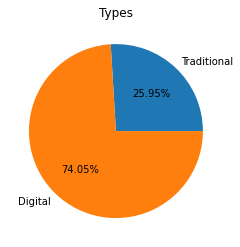

In [4]:
%run -i paco-ds-types.py

Then, we'll get a number of species drawn from the dataset: from a horrible Python script I wrote, it decouples the `Species` column and merge into one big CSV file -- making a CSV file with a single column. Then, it'll read the decoupled CSV file to get a total sum for each species drawn, and finally filter the values in ascending order.

The data below shows the first 10 of the species for simplicity, there is 63+ of total in the final dataset.

,Species,Count
60,Fox,39
61,Raccoon,16
62,Wolves,15
57,Panda,10
24,Dragons,10
38,Otter,9
59,Rabbit,8
16,Dog,6
5,Bear,5
58,Red Panda,5


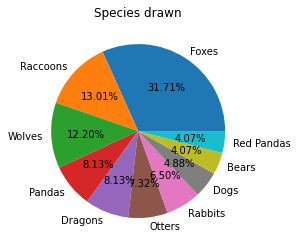

In [5]:
# This script decouples species and expressions into a big, single column CSV files
# %run -i paco-ds-merge-data.py

# ...and this script reads the decoupled CSV files and plots the data for it
%run -i paco-ds-species-2021.py

In [6]:
%run -i paco-ds-expression-2021.py

,Expressions,Count
7,Engaged,80
19,Neutral,29
2,Calm,15
11,Happy,15
20,Playful,13
29,Warm,8
6,Ecstatic,7
27,TO,5
4,Curious,3
25,Shy,3
